In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
#paths
pokedex_path = '/content/drive/My Drive/Colab Notebooks/AP/pokedex.csv'
combats_path = '/content/drive/My Drive/Colab Notebooks/AP/combats.csv'
tests_path = '/content/drive/My Drive/Colab Notebooks/AP/tests.csv'
newpokdex_path ='/content/drive/My Drive/Colab Notebooks/AP/nouveauPokedex.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Partie 1**

In [ ]:
# Disable max columns display limit
pd.set_option('display.max_columns', None)


## **Reusing the Code from Part 1**

In [ ]:
nosPokemons = pd.read_csv(pokedex_path, sep=";")
nosPokemons['LEGENDAIRE'] = (nosPokemons['LEGENDAIRE'] == 'VRAI').astype(int)
nosPokemons['NOM'][62] = "Colosinge"

<ipython-input-10-31f130da1a4b>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  nosPokemons['NOM'][62] = "Colosinge"
<ipython-input-10-31f130da1a4b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [ ]:
combats= pd.read_csv(combats_path)
tests = pd.read_csv(tests_path)

In [ ]:
# Count occurrences of Pokemon in each position
nbFoisPremierePosition = combats.groupby('First_pokemon').count()
nbFoisSecondePosition = combats.groupby('Second_pokemon').count()

# Total number of battles
nombreTotalDeCombats = nbFoisPremierePosition + nbFoisSecondePosition

# Number of victories per Pokemon
nombreDeVictoires = combats.groupby('Winner').count()

In [ ]:
# Aggregating results
listeAAgreger = combats.groupby('Winner').count().sort_index()
listeAAgreger['NBR_COMBATS'] = nbFoisPremierePosition.Winner + nbFoisSecondePosition.Winner
listeAAgreger['NBR_VICTOIRES'] = nombreDeVictoires.First_pokemon
listeAAgreger['POURCENTAGE_DE_VICTOIRES'] = nombreDeVictoires.First_pokemon / (nbFoisPremierePosition.Winner + nbFoisSecondePosition.Winner)

In [ ]:
# Merge with the original Pokemon data
nouveauPokedex = nosPokemons.merge(listeAAgreger, left_on='NUMERO', right_index=True, how='left')

# Display the merged dataframe
nouveauPokedex

,NUMERO,NOM,TYPE_1,TYPE_2,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE,First_pokemon,Second_pokemon,NBR_COMBATS,NBR_VICTOIRES,POURCENTAGE_DE_VICTOIRES
0,1,Bulbizarre,Herbe,Poison,45,49,49,65,65,45,1,0,37.0,37.0,133.0,37.0,0.278195
1,2,Herbizarre,Herbe,Poison,60,62,63,80,80,60,1,0,46.0,46.0,121.0,46.0,0.380165
2,3,Florizarre,Herbe,Poison,80,82,83,100,100,80,1,0,89.0,89.0,132.0,89.0,0.674242
3,4,Mega Florizarre,Herbe,Poison,80,100,123,122,120,80,1,0,70.0,70.0,125.0,70.0,0.560000
4,5,Salamèche,Feu,NaN,39,52,43,60,50,65,1,0,55.0,55.0,112.0,55.0,0.491071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Roche,Fée,50,100,150,100,150,50,6,1,39.0,39.0,105.0,39.0,0.371429
796,797,Mega Diancie,Roche,Fée,50,160,110,160,110,110,6,1,116.0,116.0,131.0,116.0,0.885496
797,798,Hoopa confiné,Psy,Spectre,80,110,60,150,130,70,6,1,60.0,60.0,119.0,60.0,0.504202
798,799,Hoopa non lié,Psy,Obscur,80,160,60,170,130,80,6,1,89.0,89.0,144.0,89.0,0.618056


## **Statistical Analysis**

In [ ]:
nouveauPokedex.describe()

,NUMERO,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE,First_pokemon,Second_pokemon,NBR_COMBATS,NBR_VICTOIRES,POURCENTAGE_DE_VICTOIRES
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000,783.000000,783.000000,783.000000,783.000000,783.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.08125,63.856960,63.856960,127.541507,63.856960,0.501538
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.27339,32.925941,32.925941,11.397402,32.925941,0.254993
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.00000,3.000000,3.000000,92.000000,3.000000,0.021739
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.00000,36.000000,36.000000,120.000000,36.000000,0.284228
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.00000,62.000000,62.000000,128.000000,62.000000,0.491071
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.00000,91.000000,91.000000,135.000000,91.000000,0.717644
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,1.00000,152.000000,152.000000,164.000000,152.000000,0.984496



## **Identifying Important Pokemon Types**

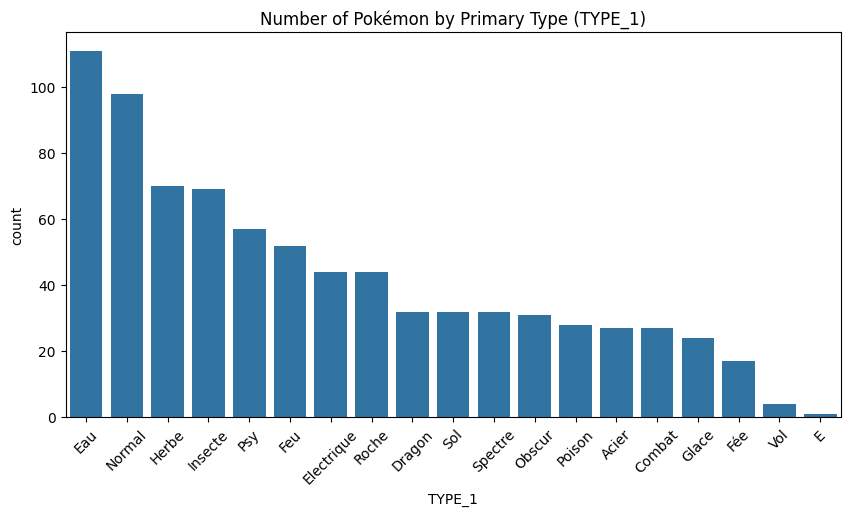

In [ ]:

plt.figure(figsize=(10,5))
sns.countplot(data=nosPokemons, x='TYPE_1', order=nosPokemons['TYPE_1'].value_counts().index)
plt.title('Number of Pokémon by Primary Type (TYPE_1)')
plt.xticks(rotation=45)
plt.show()

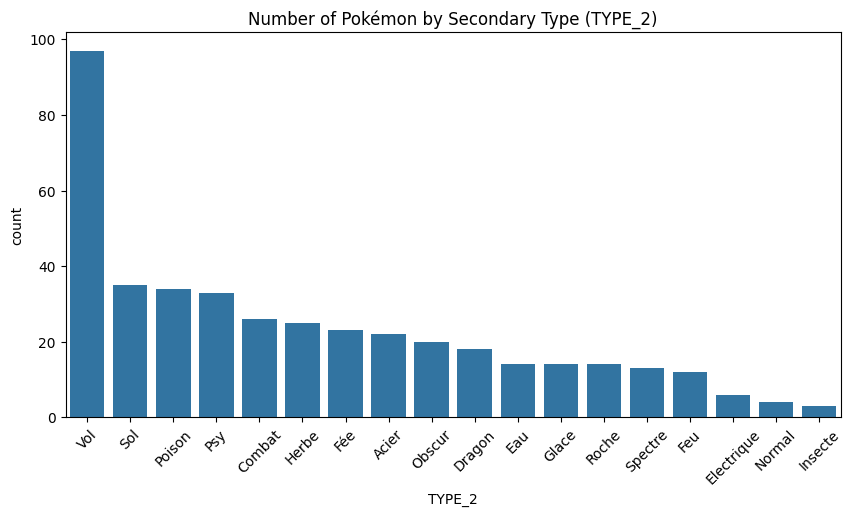

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=nosPokemons, x='TYPE_2', order=nosPokemons['TYPE_2'].value_counts().index)
plt.title('Number of Pokémon by Secondary Type (TYPE_2)')
plt.xticks(rotation=45)
plt.show()


## **Winning Pokémon Types**

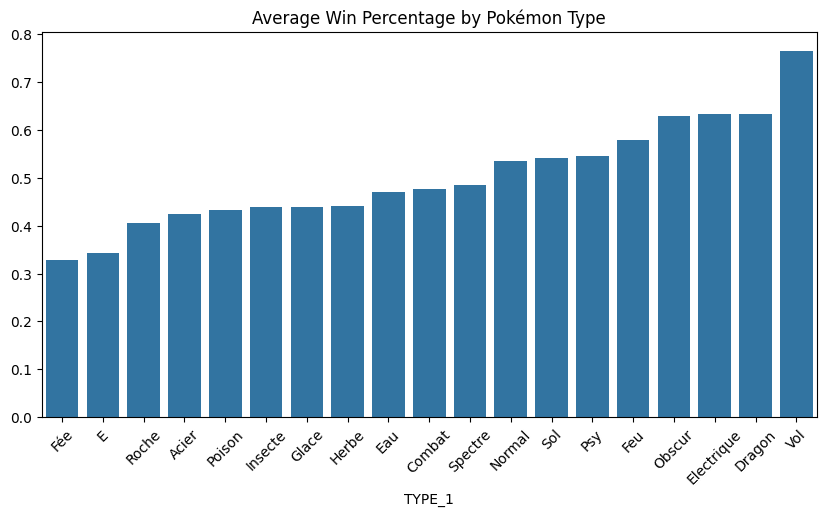

In [ ]:
# Calculate average win percentage by type
average_win_percentage_by_type = nouveauPokedex.groupby('TYPE_1')['POURCENTAGE_DE_VICTOIRES'].mean().sort_values()

# Plotting the results
plt.figure(figsize=(10,5))
sns.barplot(x=average_win_percentage_by_type.index, y=average_win_percentage_by_type.values)
plt.title('Average Win Percentage by Pokémon Type')
plt.xticks(rotation=45)
plt.show()

## **HeatMap for Correlation**

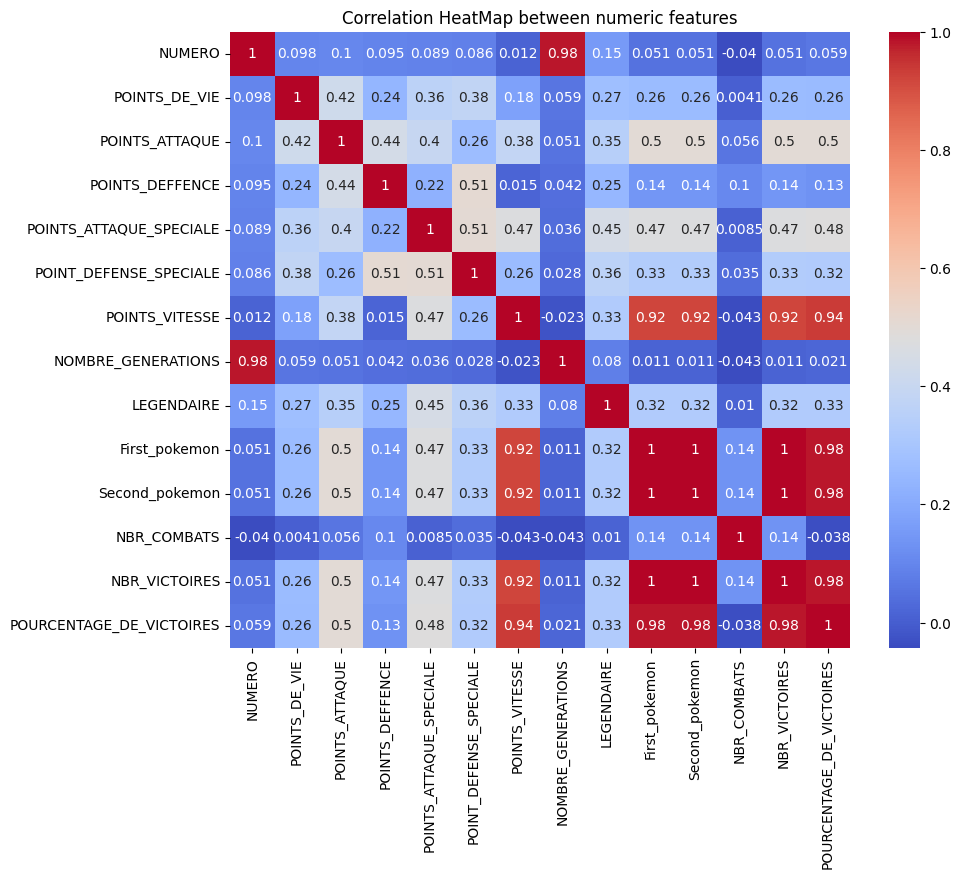

In [ ]:
# Selecting only numeric columns for correlation
numeric_columns = nouveauPokedex.select_dtypes(include=[np.number])

# Calculating the correlation matrix
corr_matrix = numeric_columns.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation HeatMap between numeric features')
plt.show()

## **Save the dataframe to a CSV file**

In [ ]:

nouveauPokedex.to_csv("dataset_TP2-1.csv", index=False)

# **Partie 2**

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error ,accuracy_score , precision_score

## **Load and preprocess the dataset**

In [ ]:
data = pd.read_csv(newpokdex_path)
data = data.dropna()  # Remove rows with missing values

In [ ]:
# Define the features (X) and target (Y) using the correct column names
X = data[['POINTS_DE_VIE', 'POINTS_ATTAQUE', 'POINTS_DEFFENCE', 'POINTS_ATTAQUE_SPECIALE',
          'POINT_DEFENSE_SPECIALE', 'POINTS_VITESSE', 'NOMBRE_GENERATIONS']]
Y = data['POURCENTAGE_DE_VICTOIRES']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


## **Linear Regression**

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_linear = linear_reg.predict(X_test)

In [ ]:
# Evaluate the model
mse_linear = mean_squared_error(Y_test, Y_pred_linear)

print(f"Linear Regression Mean Squared Error: {mse_linear}")


Linear Regression Mean Squared Error: 0.00335191971981861


## **Decision Trees for Regression**

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_tree = tree_reg.predict(X_test)

In [ ]:
# Evaluate the model
mse_tree = mean_squared_error(Y_test, Y_pred_tree)
print(f"Decision Tree Mean Squared Error: {mse_tree}")


Decision Tree Mean Squared Error: 0.006918588693753304


## **Random Forests for Regression**

In [ ]:
# Random Forest Regression
forest_reg = RandomForestRegressor(random_state=42, n_estimators=100)
forest_reg.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_forest = forest_reg.predict(X_test)

In [ ]:
# Evaluate the model
mse_forest = mean_squared_error(Y_test, Y_pred_forest)
print(f"Random Forest Mean Squared Error: {mse_forest}")

Random Forest Mean Squared Error: 0.003359619845897046


## **Compare Results**

In [ ]:
# Compare the MSEs of the three models
print(f"Linear Regression MSE: {mse_linear}")
print(f"Decision Tree MSE: {mse_tree}")
print(f"Random Forest MSE: {mse_forest}")

Linear Regression MSE: 0.00335191971981861
Decision Tree MSE: 0.006918588693753304
Random Forest MSE: 0.003359619845897046


Save the Best Model

In [ ]:
import joblib

# Save the Random Forest model (or any other model that performs best)
joblib.dump(forest_reg, 'forest_reg_model.pkl')


['forest_reg_model.pkl']

# **Partie 3**

## **Function to Retrieve Pokémon Information**

In [ ]:
def get_pokemon_info(pokedex, pokemon_number):

    pokemon_info = pokedex[pokedex['NUMERO'] == pokemon_number]

    if pokemon_info.empty:
        print(f"Pokémon with number {pokemon_number} not found in the Pokédex.")
        return None

    return pokemon_info


## **Function to Predict the Winner**

In [ ]:
def predict_winner(pokemon1_number, pokemon2_number, pokedex, model_path):

    # Load the trained model
    try:
        model = joblib.load(model_path)
    except Exception as e:
        return f"Error loading model: {str(e)}"

    # Get information about both Pokémon
    pokemon1_info = get_pokemon_info(pokedex, pokemon1_number)
    pokemon2_info = get_pokemon_info(pokedex, pokemon2_number)

    if pokemon1_info is None or pokemon2_info is None:
        return "One or both Pokémon numbers are invalid."

    # Extract relevant features for both Pokémon
    features = ['POINTS_DE_VIE', 'POINTS_ATTAQUE', 'POINTS_DEFFENCE', 'POINTS_ATTAQUE_SPECIALE',
          'POINT_DEFENSE_SPECIALE', 'POINTS_VITESSE', 'NOMBRE_GENERATIONS']

    try:
        pokemon1_stats = pokemon1_info[features].values
        pokemon2_stats = pokemon2_info[features].values

        # Predict the percentage of victory for each Pokémon
        pokemon1_victory_prob = model.predict(pokemon1_stats)[0]
        pokemon2_victory_prob = model.predict(pokemon2_stats)[0]

        # Determine the winner based on the higher predicted percentage
        if pokemon1_victory_prob > pokemon2_victory_prob:
            return  f" le pokemon N°{ pokemon1_info['NUMERO'].values[0]} {pokemon1_info['NOM'].values[0]}   is predicted to win with a {pokemon1_victory_prob*100:.2f}% chance of victory."
        else:
            return f"le pokemon N°{ pokemon1_info['NUMERO'].values[0]} {pokemon1_info['NOM'].values[0]}  is predicted to win with a {pokemon2_victory_prob*100:.2f}% chance of victory."
    except Exception as e:
        return f"Error in prediction: {str(e)}"

## **Example of Full Integration**

In [ ]:
def main():
    # Load your Pokédex
    pokedex = pd.read_csv(newpokdex_path)
    pokedex['LEGENDAIRE'] = (pokedex['LEGENDAIRE'] == 'VRAI').astype(int)

    # Load your trained model
    model_path = 'forest_reg_model.pkl'

    # Example interaction
    while True:
        print("\nEnter the numbers of the two Pokémon to battle (or 'exit' to quit):")
        pokemon1_input = input("Enter the number of the first Pokémon: ")
        if pokemon1_input.lower() == 'exit':
            break
        pokemon2_input = input("Enter the number of the second Pokémon: ")
        if pokemon2_input.lower() == 'exit':
            break

        try:
            pokemon1_number = int(pokemon1_input)
            pokemon2_number = int(pokemon2_input)
            result = predict_winner(pokemon1_number, pokemon2_number, pokedex, model_path)
            print(result)
        except ValueError:
            print("Please enter valid Pokémon numbers.")

if __name__ == "__main__":
    main()


Enter the numbers of the two Pokémon to battle (or 'exit' to quit):


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


le pokemon N°150 Amonita  is predicted to win with a 50.77% chance of victory.

Enter the numbers of the two Pokémon to battle (or 'exit' to quit):
